In [1]:
# Decesion tree classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
X = df [['pclass','sex', 'age', 'sibsp', 'parch', 'fare' ]]
y = df ['survived']

In [6]:
# Converting Categorical values to numerical
X = pd.get_dummies(X, columns=['sex'])

In [7]:
# Finding Null Values
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [10]:
# Filling null values with mean
X.fillna(X.mean(), inplace=True)

In [11]:
# Checking null values again
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [12]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Creating Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Now predicting values
y_pred = model.predict(X_test)

In [15]:
# Finding accuracy score
accuracy_score(y_test, y_pred)

0.7877094972067039

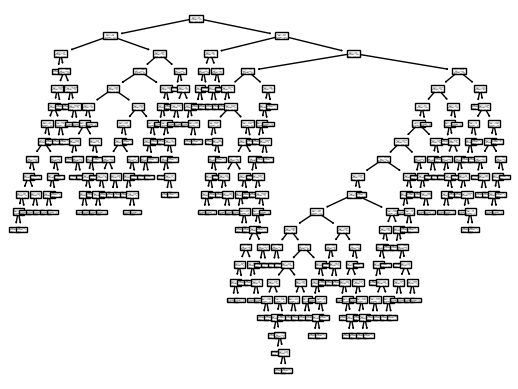

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting graph
tree.plot_tree(model)
plt.show()
plt.savefig('tree.png')

In [18]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7719298245614035

In [19]:
# recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6376811594202898

In [20]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6984126984126984

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[97, 13],
       [25, 44]], dtype=int64)

<AxesSubplot: >

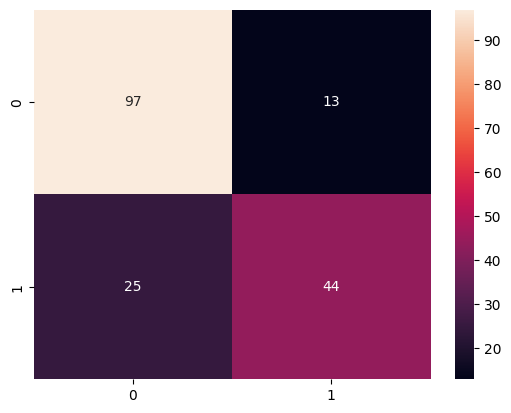

In [23]:
# Plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [25]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[91, 19],
       [25, 44]], dtype=int64)

<AxesSubplot: >

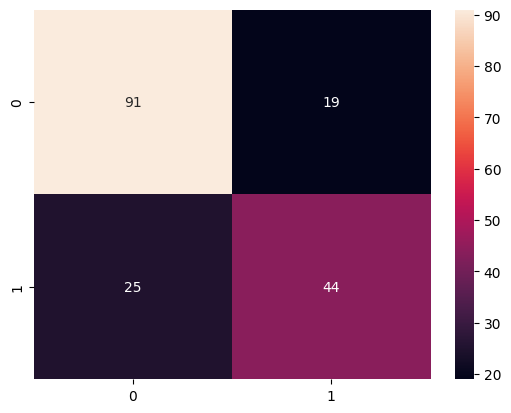

In [27]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [29]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[101,   9],
       [ 22,  47]], dtype=int64)

<AxesSubplot: >

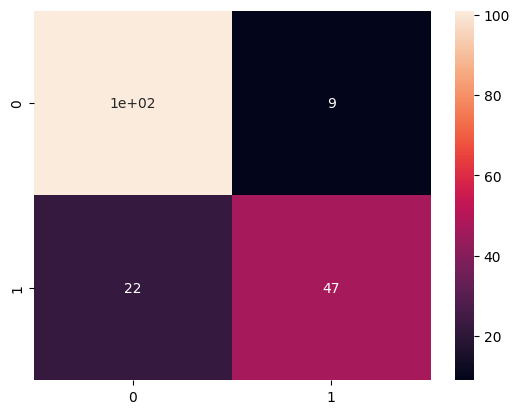

In [31]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [34]:
print(precision_score(y_test, y_pred))
print (recall_score(y_test, y_pred))
print (f1_score(y_test, y_pred))


0.8392857142857143
0.6811594202898551
0.752


In [35]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\ff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[95, 15],
       [21, 48]], dtype=int64)

In [37]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [38]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[104,   6],
       [ 44,  25]], dtype=int64)

In [39]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [41]:
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[93, 17],
       [20, 49]], dtype=int64)

In [43]:
# Choosing best Model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
print(scores)

[0.75555556 0.73033708 0.69662921 0.76404494 0.84269663 0.7752809
 0.82022472 0.75280899 0.84269663 0.82022472]
0.7800499375780274
